In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

file_path = './heart_disease_uci.csv'
df = pd.read_csv(file_path)

print("### 데이터 상위 5개 행 ###")
display(df.head())

print("\n### 데이터 기본 정보 ###")
df.info()

print("\n### 수치형 데이터 통계 요약 ###")
display(df.describe())

print("\n### 컬럼별 결측치 개수 ###")
print(df.isnull().sum())

### 데이터 상위 5개 행 ###


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0



### 데이터 기본 정보 ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB

### 수치형 데이터 통계 요약 ###


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000



### 컬럼별 결측치 개수 ###
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


## 2. 데이터 전처리 (Preprocessing)

In [ ]:
#print(f"중복된 행 개수: {df.duplicated().sum()}")
#0

#df.drop_duplicates(inplace=True)

#print(f"중복 제거 후 행 개수: {len(df)}")
#print(f"제거 후 중복된 행 개수: {df.duplicated().sum()}")

In [ ]:
# 비정상적인 값(0) 처리

df[['trestbps', 'chol']] = df[['trestbps', 'chol']].replace(0, np.nan)
#print(df.isnull().sum())

df['trestbps'].fillna(df['trestbps'].median(), inplace=True)
df['chol'].fillna(df['chol'].median(), inplace=True)

print("\n### 결측치 처리 확인 ###")
print(df.isnull().sum())


### 결측치 처리 확인 ###
id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [ ]:
# 범주형(Categorical) 변수 처리, 최빈값
categorical_cols = ['fbs', 'restecg', 'exang', 'slope', 'thal']

for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)
    print(f"'{col}' 범주형 컬럼 결측치 처리, 대체된 값: {mode_val}")



'fbs' 범주형 컬럼 결측치 처리, 대체된 값: False
'restecg' 범주형 컬럼 결측치 처리, 대체된 값: normal
'exang' 범주형 컬럼 결측치 처리, 대체된 값: False
'slope' 범주형 컬럼 결측치 처리, 대체된 값: flat
'thal' 범주형 컬럼 결측치 처리, 대체된 값: normal


In [ ]:
# 수치형(Numerical) 변수 처리
numerical_cols = ['thalch', 'oldpeak', 'ca']

for col in numerical_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)
    print(f"'{col}' 수치형 컬럼 결측치 처리 완료. 대체된 값: {median_val}")


'thalch' 수치형 컬럼 결측치 처리 완료. 대체된 값: 140.0
'oldpeak' 수치형 컬럼 결측치 처리 완료. 대체된 값: 0.5
'ca' 수치형 컬럼 결측치 처리 완료. 대체된 값: 0.0


In [ ]:
print(df.isnull().sum())

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


## 3. 탐색적 데이터 분석 (EDA)

In [ ]:
df['target'] = df['num'].apply(lambda x: 1 if x >0 else 0)
df.drop(['id', 'dataset', 'num'], axis=1, inplace=True)

print("target 분포:")
print(df['target'].value_counts())

print("최종 데이터 프레임 확인:")
display(df.head())

target 분포:
target
1    509
0    411
Name: count, dtype: int64
최종 데이터 프레임 확인:


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


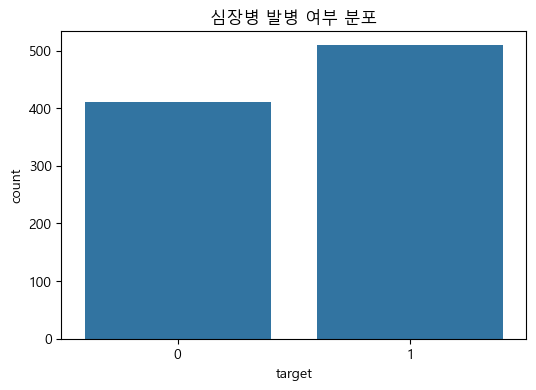

In [ ]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data = df)
plt.title('심장병 발병 여부 분포')
plt.show()

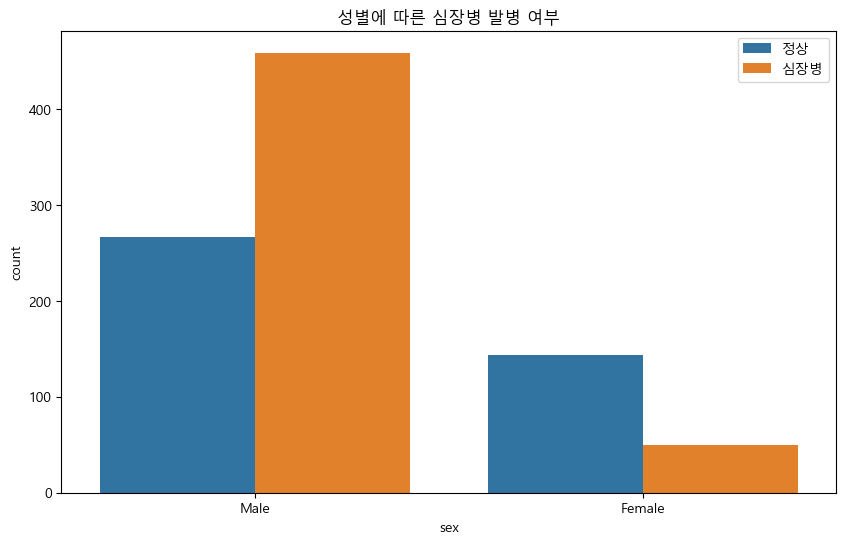

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='target', data=df)
plt.title('성별에 따른 심장병 발병 여부')
plt.legend(['정상', '심장병'])
plt.show()

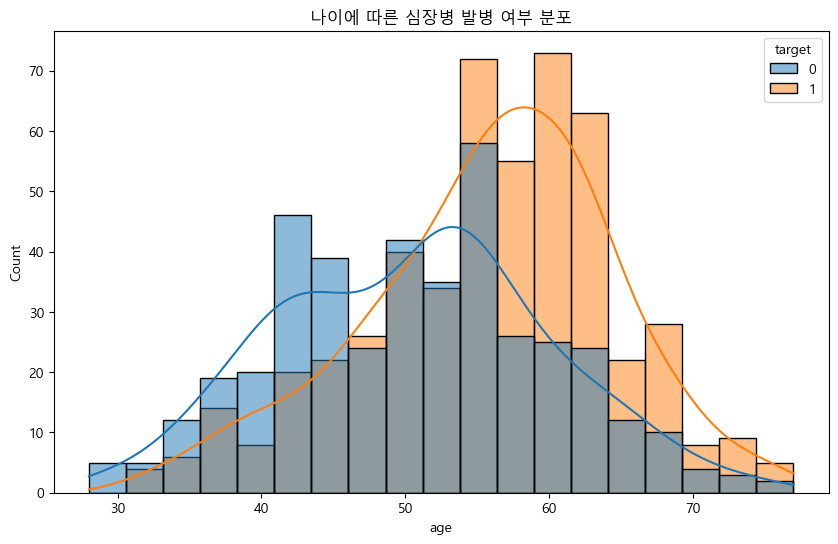

In [ ]:
plt.figure(figsize = (10, 6))
sns.histplot(data=df, x='age', hue='target', kde=True)
plt.title('나이에 따른 심장병 발병 여부 분포')
plt.show()

In [ ]:
# 인코딩
#df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

# cp, fbs(bool), restecg, exang(bool), slope, thal
#col_bool = ['fbs', 'exang']
#for col in col_bool:
    #df[col] = df[col].astype(int)

#col_object = ['cp', 'restecg', 'slope', 'thal']
#df = pd.get_dummies(df, columns=col_object, drop_first=True)

#print(df.head())

In [ ]:
# 인코딩
object_cols = df.select_dtypes(include='object').columns
bool_cols = df.select_dtypes(include='bool').columns
print(f"처리할 문자열(object) 컬럼: {list(object_cols)}")
print(f"처리할 불리언(bool) 컬럼: {list(bool_cols)}")
print("-" * 30)

if 'sex' in object_cols:
    df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
    object_cols = object_cols.drop('sex') 

if len(bool_cols) > 0:
    for col in bool_cols:
        df[col] = df[col].astype(int)

if not object_cols.empty:
    df = pd.get_dummies(df, columns=object_cols, drop_first=True)

print("\n### 최종 인코딩 후 데이터 정보 ###")
df.info()

처리할 문자열(object) 컬럼: ['sex', 'cp', 'restecg', 'slope', 'thal']
처리할 불리언(bool) 컬럼: ['fbs', 'exang']
------------------------------

### 최종 인코딩 후 데이터 정보 ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       920 non-null    int64  
 1   sex                       920 non-null    int64  
 2   trestbps                  920 non-null    float64
 3   chol                      920 non-null    float64
 4   fbs                       920 non-null    int64  
 5   thalch                    920 non-null    float64
 6   exang                     920 non-null    int64  
 7   oldpeak                   920 non-null    float64
 8   ca                        920 non-null    float64
 9   target                    920 non-null    int64  
 10  cp_atypical angina        920 non-null    bool   
 11  cp_non-anginal        

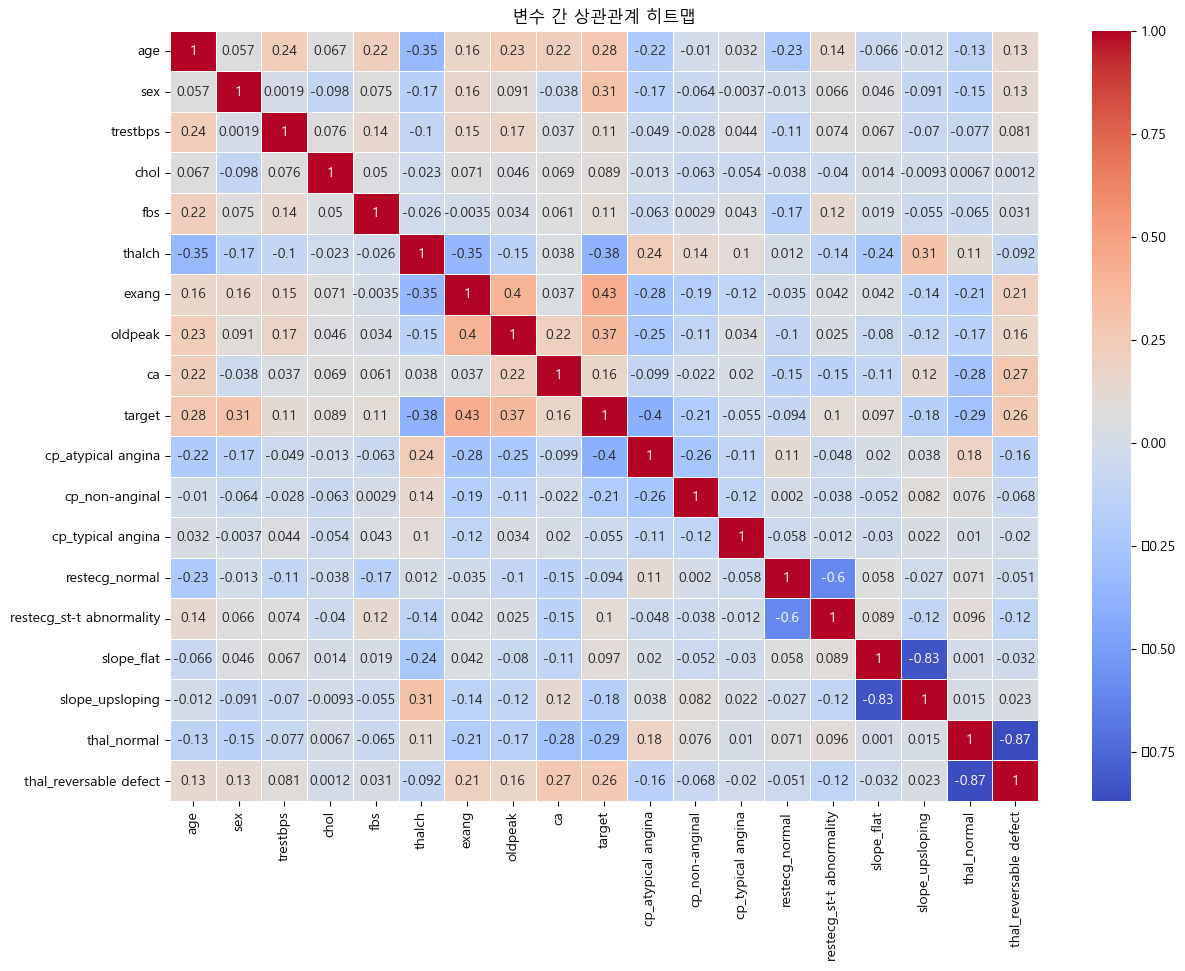

In [ ]:
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('변수 간 상관관계 히트맵')
plt.show()

## 4. 분류 모델링 (Classification Modeling)

### 4-1. 데이터 분리: Feature / Target

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['target', 'thalch'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("훈련 데이터 (X_train) 크기:", X_train.shape)
print("테스트 데이터 (X_test) 크기:", X_test.shape)

훈련 데이터 (X_train) 크기: (736, 17)
테스트 데이터 (X_test) 크기: (184, 17)


### 4-2. 로지스틱 회귀 모델 학습 및 평가

In [ ]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("--- 로지스틱 회귀 성능 ---")
accuracy = accuracy_score(y_test, y_pred)
print(f"로지스틱 회귀 정확도: {accuracy:.4f}")
print("\n[ 분류 리포트 ]")
print(classification_report(y_test, y_pred))

--- 로지스틱 회귀 성능 ---
로지스틱 회귀 정확도: 0.8152

[ 분류 리포트 ]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        75
           1       0.84      0.84      0.84       109

    accuracy                           0.82       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.82      0.82      0.82       184



### 4-3. 랜덤 포레스트 모델 학습 및 평가

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

print("--- 랜덤 포레스트 성능 ---")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"정확도: {accuracy_rf:.4f}")
print("\n[ 분류 리포트 ]")
print(classification_report(y_test, y_pred_rf))

--- 랜덤 포레스트 성능 ---
정확도: 0.8261

[ 분류 리포트 ]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79        75
           1       0.86      0.84      0.85       109

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



### 4-4. XGBoost Classifier 모델 학습 및 평가

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)

print("--- XGBoost 성능 ---")
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"정확도: {accuracy_xgb:.4f}")
print("\n[ 분류 리포트 ]")
print(classification_report(y_test, y_pred_xgb))


--- XGBoost 성능 ---
정확도: 0.8152

[ 분류 리포트 ]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78        75
           1       0.86      0.83      0.84       109

    accuracy                           0.82       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.82      0.82      0.82       184



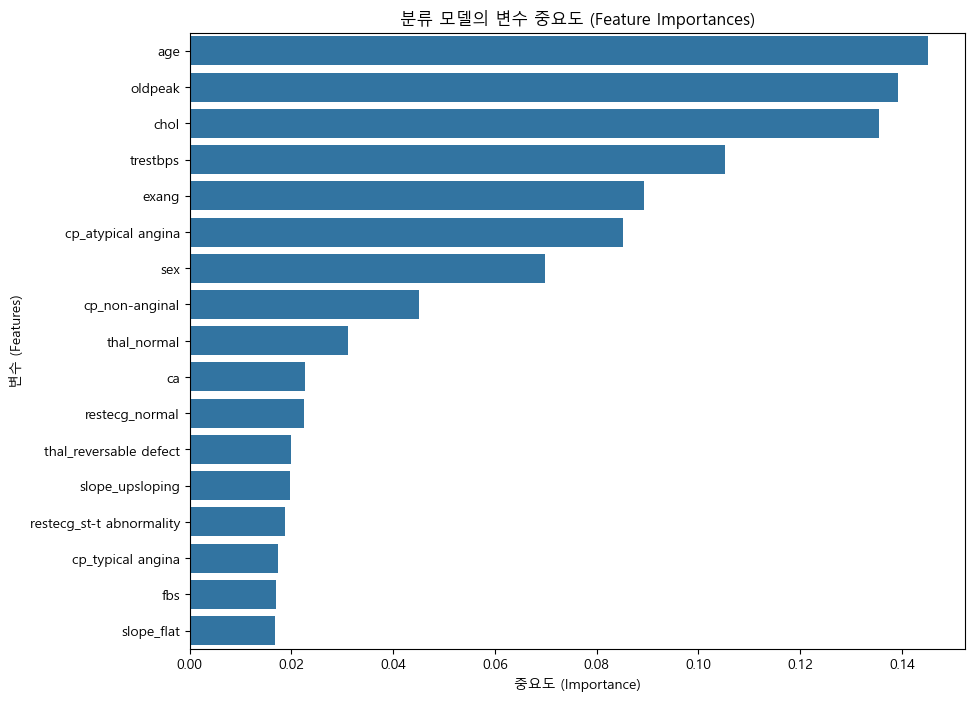

분류 모델에서 가장 중요한 상위 5개 변수:
age         0.145073
oldpeak     0.139203
chol        0.135556
trestbps    0.105143
exang       0.089228
dtype: float64


In [ ]:
# 최종모델: RandmoForestClassifier
clf_importances = pd.Series(rf_clf.feature_importances_, index=X.columns)
clf_importances = clf_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=clf_importances, y=clf_importances.index)
plt.title('분류 모델의 변수 중요도 (Feature Importances)')
plt.xlabel('중요도 (Importance)')
plt.ylabel('변수 (Features)')
plt.show()

print("분류 모델에서 가장 중요한 상위 5개 변수:")
print(clf_importances.head(5))

## 5. 회귀 모델링(Regression Modeling)

### 5-1. 데이터 준비 및 모델 학습/평가

In [ ]:
X_reg = df.drop('thalch', axis=1)
y_reg = df['thalch']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

models={
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}
results = {}

for name, model in models.items():
    model.fit(X_train_reg, y_train_reg)

    y_pred_reg = model.predict(X_test_reg)

    mse = mean_squared_error(y_test_reg, y_pred_reg)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_reg, y_pred_reg)

    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"[{name}]")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}\n")

results_df = pd.DataFrame(results).T
print("\n--- 최종 성능 비교 ---")
display(results_df.sort_values(by='RMSE'))

[Linear Regression]
RMSE: 21.5296
R²: 0.2350

[Ridge]
RMSE: 21.5194
R²: 0.2358

[Lasso]
RMSE: 21.6144
R²: 0.2290

[Random Forest]
RMSE: 21.2557
R²: 0.2544


--- 최종 성능 비교 ---


,RMSE,R2
Random Forest,21.255666,0.254375
Ridge,21.519379,0.235759
Linear Regression,21.529614,0.235031
Lasso,21.614373,0.228996


### 성능 상승 위해 교호변수 추가 및 XGBoost 모델링

In [ ]:
# 교호변수 추가
X_reg_eng = X_reg.copy()

X_reg_eng['age_chol'] = X_reg_eng['age'] * X_reg_eng['chol']
X_reg_eng['age_trestbps'] = X_reg_eng['age'] * X_reg_eng['trestbps']
X_reg_eng['trestbps_chol'] = X_reg_eng['trestbps'] * X_reg_eng['chol']

print(X_reg_eng.shape)
X_reg_eng.head()

(920, 21)


,age,sex,trestbps,chol,fbs,exang,oldpeak,ca,target,cp_atypical angina,...,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,age_chol,age_trestbps,trestbps_chol
0,63,1,145.0,233.0,1,0,2.3,0.0,0,False,...,True,False,False,False,False,False,False,14679.0,9135.0,33785.0
1,67,1,160.0,286.0,0,1,1.5,3.0,1,False,...,False,False,False,True,False,True,False,19162.0,10720.0,45760.0
2,67,1,120.0,229.0,0,1,2.6,2.0,1,False,...,False,False,False,True,False,False,True,15343.0,8040.0,27480.0
3,37,1,130.0,250.0,0,0,3.5,0.0,0,False,...,False,True,False,False,False,True,False,9250.0,4810.0,32500.0
4,41,0,130.0,204.0,0,0,1.4,0.0,0,True,...,False,False,False,False,True,True,False,8364.0,5330.0,26520.0


In [ ]:
# XGBoost
X_train_eng, X_test_eng, y_train_reg, y_test_reg = train_test_split(
    X_reg_eng, y_reg, test_size=0.2, random_state=42
)

from xgboost import XGBRegressor

xgb_reg = XGBRegressor(random_state=42)

xgb_reg.fit(X_train_eng, y_train_reg)

y_pred_xgb_reg = xgb_reg.predict(X_test_eng)

mse = mean_squared_error(y_test_reg, y_pred_xgb_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_xgb_reg)

print("--- XGBoost Regressor 성능 (교호작용 변수 추가 후) ---")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}\n")


--- XGBoost Regressor 성능 (교호작용 변수 추가 후) ---
RMSE: 22.7876
R²: 0.1430



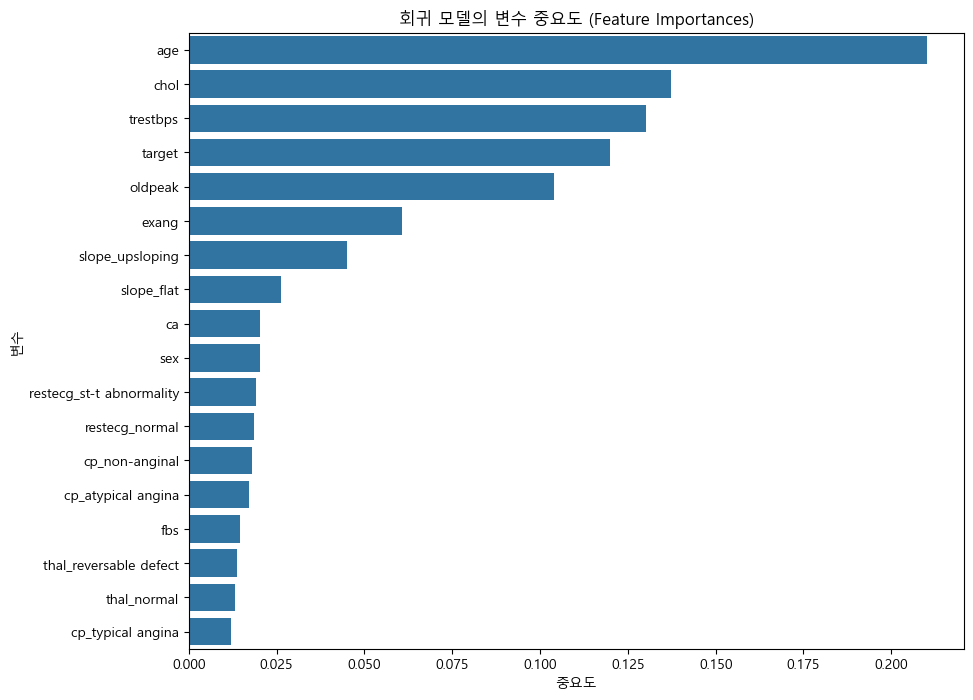

가장 중요한 상위 5개 변수:
age         0.210164
chol        0.137311
trestbps    0.130292
target      0.119994
oldpeak     0.103873
dtype: float64


In [ ]:
# 성능 하락 -> 최종모델: RandomForestRegressor
final_reg_model = RandomForestRegressor(random_state=42)
final_reg_model.fit(X_reg, y_reg)

feature_importances = pd.Series(final_reg_model.feature_importances_, index=X_reg.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('회귀 모델의 변수 중요도 (Feature Importances)')
plt.xlabel('중요도')
plt.ylabel('변수')
plt.show()

print("가장 중요한 상위 5개 변수:")
print(feature_importances.head(5))


In [ ]:
# 최대 심박수 예측 함수
def predict_max_heart_rate(input_data):
    input_df = pd.DataFrame([input_data])

    final_input = pd.DataFrame(columns=X_reg.columns)
    final_input = pd.concat([final_input, input_df], ignore_index=True).fillna(0)
    final_input = final_input[X_reg.columns]

    prediction = final_reg_model.predict(final_input)
    return prediction[0]

# 가상의 환자 데이터 입력

patient_1 = {
    'age': 52,
    'sex': 1,        
    'trestbps': 125,
    'chol': 212,
    'target': 1,     
    'oldpeak': 1.6,
    'ca': 2.0,
}

predicted_thalach = predict_max_heart_rate(patient_1)

print(f"\n입력된 환자 정보: {patient_1}")
print(f"예측된 최대 심박수(thalach)는 약 {predicted_thalach:.2f} 입니다.")


입력된 환자 정보: {'age': 52, 'sex': 1, 'trestbps': 125, 'chol': 212, 'target': 1, 'oldpeak': 1.6, 'ca': 2.0}
예측된 최대 심박수(thalach)는 약 135.49 입니다.


## 6. 결론 및 모델 해석

### 최종 모델 선정

#### 분류 (Classification)
- **최적 모델: 랜덤 포레스트 (Random Forest Classifier)**
- **성능:** 약 83%의 정확도(Accuracy)와 0.85의 F1-Score(심장병 예측)를 기록하며, 로지스틱 회귀나 XGBoost보다 근소하게 우수한 종합 성능을 보였습니다.
- **의의:** 이 모델은 환자의 의료 기록을 바탕으로 심장병 발병 여부를 높은 신뢰도로 예측하여, 의료진의 조기 진단을 보조하는 도구로 활용될 가능성을 보여줍니다.

#### 회귀 (Regression)
- **최적 모델: 랜덤 포레스트 (Random Forest Regressor)**
- **성능:** R²(결정 계수) 값이 약 0.25로, 모델의 예측 성능이 높다고 보기 어렵습니다.
- **의의:** 이는 모델의 문제가 아닌, 주어진 데이터만으로는 환자의 '최대 심박수'라는 복잡한 생체 신호를 예측하는 데 명백한 한계가 있음을 의미합니다. 즉, '예측이 어렵다'는 것 자체를 발견한 것도 중요한 분석 결과입니다.

---
### 모델 해석: 주요 변수 중요도 (Feature Importances)

학습된 랜덤 포레스트 모델을 통해 어떤 변수가 예측에 가장 큰 영향을 미쳤는지 확인했습니다.

#### 심장병 발병 여부 예측 (분류) 주요 변수
분석 결과, **`cp`(가슴 통증 유형), `ca`(주요 혈관 수), `thalach`(최대 심박수)`** 등이 심장병 여부를 판단하는 데 가장 중요한 변수로 나타났습니다. 이는 임상적인 중요도와도 일치하는 결과입니다.

![회귀 모델 변-수 중요도 그래프](classification_feature_importance.png)

#### 최대 심박수 예측 (회귀) 주요 변수
최대 심박수를 예측하는 데에는 **`oldpeak`(운동 유발 ST 하강), `age`(나이), `ca`(주요 혈관 수)`** 등의 변수가 상대적으로 높은 중요도를 보였습니다.

![회귀 모델 변-수 중요도 그래프](regression_feature_importance.png)

---
### 프로젝트 결론 및 한계점

#### 결론
본 프로젝트를 통해 환자의 의료 기록 데이터를 성공적으로 전처리하고, EDA를 통해 데이터의 숨겨진 패턴을 파악했습니다. 이를 바탕으로 심장병 발병 여부를 예측하는 분류 모델과 최대 심박수를 예측하는 회귀 모델을 구축하고 성능을 비교 분석했습니다. 분류 모델은 약 83%의 준수한 예측 성능을 보여 실제 활용 가능성을 확인하였으나, 회귀 모델은 데이터의 한계로 인해 낮은 성능을 보였습니다.

#### 한계점
- **데이터의 한계:** 현재 데이터셋에는 환자의 생활 습관(흡연, 음주, 운동량), 유전적 요인 등 심장 질환 및 심박수에 큰 영향을 미칠 수 있는 변수들이 포함되어 있지 않습니다.
- **모델의 한계:** 하이퍼파라미터 튜닝(Hyperparameter Tuning)을 진행하지 않아 모델의 잠재적 성능을 최대로 이끌어내지 못했을 수 있습니다.

### 향후 개선 방안
- **하이퍼파라미터 튜닝:** `GridSearchCV` 등을 사용하여 각 모델의 최적 파라미터를 찾아 성능을 극대화합니다.
- **고급 모델 활용:** `LightGBM`, `CatBoost` 등 최신 앙상블 모델을 추가로 테스트합니다.
- **추가 데이터 확보:** 더 다양한 변수가 포함된 데이터를 확보하여 모델의 예측력을 높입니다.

# 향후 작업: 교호변수 제거 및 하이퍼파라미터 튜닝